In [5]:
# kind of VGG

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Input
from keras.optimizers import SGD, Adam
from keras.utils import to_categorical
import keras.backend as K
from keras.layers import Lambda, BatchNormalization, Dropout
%matplotlib inline

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = (X_train - 127.5) / 127.5
X_test = (X_test - 127.5) / 127.5
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [3]:
model = Sequential()

#model.add(Input(shape=(32, 32,3)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(MaxPool2D((2, 2)))


model.add(Flatten())

model.add(Dense(64))
model.add(Dense(32))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy']              
             )

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 256)         295168    
__________

In [4]:
log = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=256)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 20s 393us/step - loss: 2.3043 - acc: 0.1002 - val_loss: 2.3031 - val_acc: 0.1000
Epoch 2/100
50000/50000 [==============================] - 15s 301us/step - loss: 1.9286 - acc: 0.2463 - val_loss: 1.5873 - val_acc: 0.3963
Epoch 3/100
50000/50000 [==============================] - 15s 301us/step - loss: 1.3912 - acc: 0.4782 - val_loss: 1.2581 - val_acc: 0.5457
Epoch 4/100
50000/50000 [==============================] - 15s 300us/step - loss: 1.0913 - acc: 0.6019 - val_loss: 1.0925 - val_acc: 0.6045
Epoch 5/100
50000/50000 [==============================] - 15s 301us/step - loss: 0.9035 - acc: 0.6770 - val_loss: 0.8954 - val_acc: 0.6866
Epoch 6/100
50000/50000 [==============================] - 15s 300us/step - loss: 0.7638 - acc: 0.7279 - val_loss: 0.8437 - val_acc: 0.7132
Epoch 7/100
50000/50000 [==============================] - 15s 301us/step - loss: 0.6411 - acc: 0.7729 - val_l

Epoch 59/100
50000/50000 [==============================] - 15s 302us/step - loss: 0.0379 - acc: 0.9885 - val_loss: 1.2993 - val_acc: 0.7786
Epoch 60/100
50000/50000 [==============================] - 15s 301us/step - loss: 0.0313 - acc: 0.9902 - val_loss: 1.3556 - val_acc: 0.7795
Epoch 61/100
50000/50000 [==============================] - 15s 301us/step - loss: 0.0424 - acc: 0.9871 - val_loss: 1.3477 - val_acc: 0.7731
Epoch 62/100
50000/50000 [==============================] - 15s 301us/step - loss: 0.0317 - acc: 0.9899 - val_loss: 1.3803 - val_acc: 0.7795
Epoch 63/100
50000/50000 [==============================] - 15s 301us/step - loss: 0.0384 - acc: 0.9883 - val_loss: 1.4230 - val_acc: 0.7741
Epoch 64/100
50000/50000 [==============================] - 15s 298us/step - loss: 0.0386 - acc: 0.9873 - val_loss: 1.2974 - val_acc: 0.7772
Epoch 65/100
50000/50000 [==============================] - 15s 299us/step - loss: 0.0451 - acc: 0.9859 - val_loss: 1.3385 - val_acc: 0.7782
Epoch 66/100


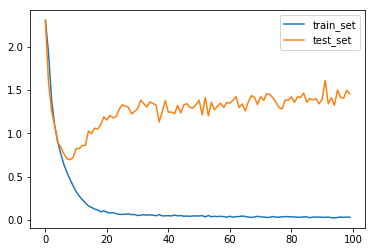

In [6]:
plt.plot(log.history['loss'], label='train_set')
plt.plot(log.history['val_loss'], label='test_set')
plt.legend()

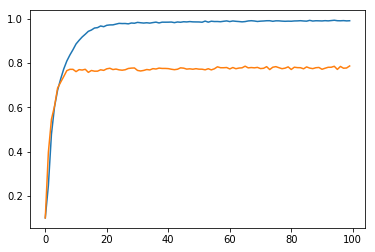

In [7]:
plt.plot(log.history['acc'], label='train_set')
plt.plot(log.history['val_acc'], label='test_set')

In [8]:
model.evaluate(X_train, y_train, batch_size=256)

50000/50000 [==============================] - 5s 104us/step


[0.012281040828227997, 0.99652]

In [9]:
model.evaluate(X_test, y_test, batch_size=256)

10000/10000 [==============================] - 1s 101us/step


[1.4548413188934326, 0.7866]